## CHSH Inequality 

### CHSH Game Problem Statement
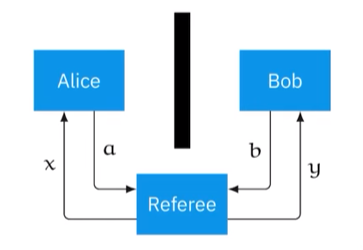

**Inequality :** $...$
1. $x,y,a,b \in \{0,1\}$
2. Question $x,y$ are chosen **Uniformly at random**
3. A Paire of answer $(a,b)$ wins for $(x,y)$ if and only if $a\oplus b = x \land y$

|$(x,y)$|**Condition**|
|-----|---------|
| $(0,0)$ |$a=b$|
| $(0,1)$ |$a=b$|
| $(1,0)$ |$a=b$|
| $(1,1)$ |$a \neq b$|



In [2]:
import qiskit as qk 
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from qiskit import Aer 
Aer.backends()
qasm_sim = Aer.get_backend("qasm_simulator")
sv_sim = Aer.get_backend("statevector_simulator")
aer_sim = Aer.get_backend("aer_simulator")

In [4]:
## Preparing Phase andUnitary Gate  
A_0  = 0
A_1 = np.pi/4
B_0 = np.pi/8
B_1 = -np.pi/8 

In [5]:
## Alicee and bob
alice = qk.QuantumRegister(1,name="Alice")
bob = qk.QuantumRegister(1,name="Bob")
referee_x = qk.QuantumRegister(1,name="Referee_X") 
referee_y = qk.QuantumRegister(1,name="Referee_Y") 
m_alice = qk.ClassicalRegister(1, name="Alice_measure")
m_bob = qk.ClassicalRegister(1, name="Bob_measure")
input_x = qk.ClassicalRegister(1, name= "Input_X")
input_y = qk.ClassicalRegister(1, name= "Input_Y")
 

In [6]:
CHSH_circuit = qk.QuantumCircuit(alice, bob, referee_x, referee_y, input_x, input_y, m_alice, m_bob)
CHSH_circuit.h(alice)
CHSH_circuit.cx(alice,bob)
CHSH_circuit.h(referee_x)
CHSH_circuit.measure(referee_x,input_x)
CHSH_circuit.h(referee_y)
CHSH_circuit.measure(referee_y,input_y)
CHSH_circuit.barrier()

## Stratagy begins 

CHSH_circuit.p(A_0,alice).c_if(input_x,0)
CHSH_circuit.p(A_1,alice).c_if(input_x,1)
CHSH_circuit.p(B_0,bob).c_if(input_y,0)
CHSH_circuit.p(B_1,bob).c_if(input_y,1)

CHSH_circuit.measure([alice[0],bob[0]],[m_alice[0],m_bob[0]])

CHSH_circuit.draw()


┌───┐         ░ ┌──────┐          ┌────────┐           ┌─┐   
          Alice: ┤ H ├──■──────░─┤ P(0) ├──────────┤ P(π/4) ├───────────┤M├───
                 └───┘┌─┴─┐    ░ └──╥───┘┌────────┐└───╥────┘┌─────────┐└╥┘┌─┐
            Bob: ─────┤ X ├────░────╫────┤ P(π/8) ├────╫─────┤ P(-π/8) ├─╫─┤M├
                 ┌───┐└┬─┬┘    ░    ║    └───╥────┘    ║     └────╥────┘ ║ └╥┘
      Referee_X: ┤ H ├─┤M├─────░────╫────────╫─────────╫──────────╫──────╫──╫─
                 ├───┤ └╥┘ ┌─┐ ░    ║        ║         ║          ║      ║  ║ 
      Referee_Y: ┤ H ├──╫──┤M├─░────╫────────╫─────────╫──────────╫──────╫──╫─
                 └───┘  ║  └╥┘ ░ ┌──╨──┐     ║      ┌──╨──┐       ║      ║  ║ 
      Input_X: 1/═══════╩═══╬════╡ 0x0 ╞═════╬══════╡ 0x1 ╞═══════╬══════╬══╬═
                        0   ║    └─────┘  ┌──╨──┐   └─────┘    ┌──╨──┐   ║  ║ 
      Input_Y: 1/═══════════╩═════════════╡ 0x0 ╞══════════════╡ 0x1 ╞═══╬══╬═
                            0             └─────┘              └─────┘   ║  ║ 
Alice_measure: 1/════════════════════════════════════════════════════════╩══╬═
                                                                         0  ║ 
  Bob_measure: 1/═══════════════════════════════════════════════════════════╩═
                                                                            0

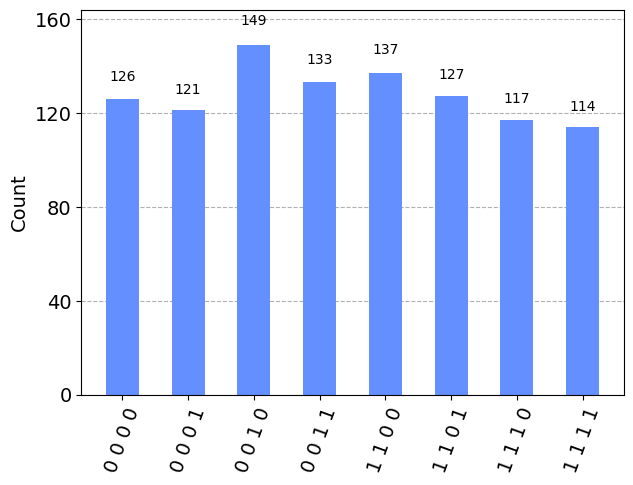

In [7]:
result = qasm_sim.run(CHSH_circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [8]:
counts

{'0 0 1 1': 133,
 '1 1 0 0': 137,
 '1 1 1 1': 114,
 '0 0 0 1': 121,
 '1 1 1 0': 117,
 '1 1 0 1': 127,
 '0 0 1 0': 149,
 '0 0 0 0': 126}

In [8]:
# for bit_string in counts:
#     bit = np.array([int(i) for i in bit_string.split(' ')],dtype=int)
    
     
    

In [9]:
from qiskit_ibm_provider import  IBMProvider 
provider = IBMProvider()
provider.backends()

[<IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_mps')>]

In [10]:
backend = provider.get_backend("ibm_brisbane")
backend.configuration()

D:\AritrA\QC\.qc\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


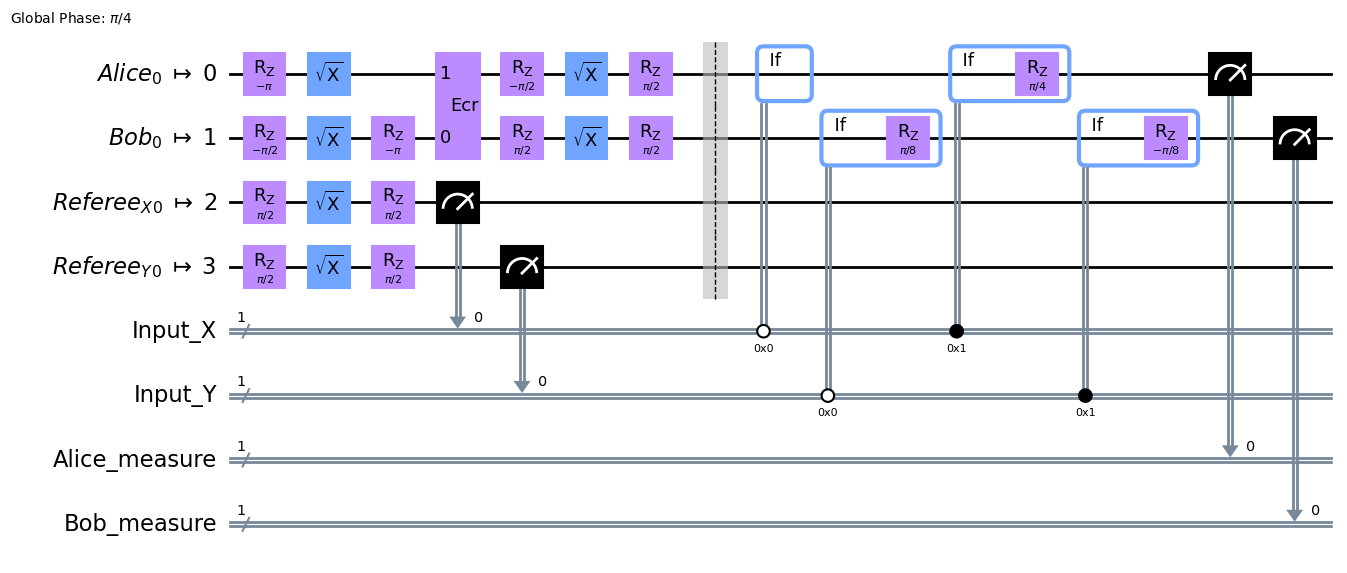

In [11]:
from qiskit import transpile 
transpiled_circuit = transpile(CHSH_circuit, backend=backend)
transpiled_circuit.draw("mpl",idle_wires=False,)

In [21]:
job = backend.run(transpiled_circuit)

In [23]:
job.status()

<JobStatus.ERROR: 'job incurred error'>

In [14]:
# Initialize your account 
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService()
 
service.backends()

[<IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyoto')>,
 <IBMBackend('ibm_osaka')>,
 <IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('simulator_extended_stabilizer')>]

In [20]:
job.status()

<JobStatus.ERROR: 'job incurred error'>

In [24]:
calibration_data = backend.properties()

In [1]:
calibration_data.t1

NameError: name 'calibration_data' is not defined